In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torchsummary import summary

In [3]:
df = pd.read_csv("C:/Users/하태권/Downloads/healthcare-dataset-stroke-data.csv") #데이터 로딩
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:

df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:

df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:

# 데이터와 타겟 분리
X = df.drop('stroke', axis=1).values
y = df['stroke'].values

In [11]:

df['gender'] = LabelEncoder().fit_transform(df['gender'])
df['ever_married'] = LabelEncoder().fit_transform(df['ever_married'])
df['work_type'] = LabelEncoder().fit_transform(df['work_type'])
df['Residence_type'] = LabelEncoder().fit_transform(df['Residence_type'])
df['bmi'] = LabelEncoder().fit_transform(df['bmi'])
df['smoking_status'] = LabelEncoder().fit_transform(df['smoking_status'])
df
#변수 인코

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,239,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,418,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,198,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,217,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,113,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,418,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,273,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,179,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,129,1,0


In [13]:

df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [15]:

# 데이터와 타겟 분리
X = df.drop('stroke', axis=1).values
y = df['stroke'].values

In [17]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape, 

((4088, 11), (1022, 11), (4088,), (1022,))

In [19]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

In [21]:
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([4088, 11]),
 torch.Size([1022, 11]),
 torch.Size([4088, 1]),
 torch.Size([1022, 1]))

In [25]:
class healthDense(nn.Module):
    def __init__(self):
        super(healthDense, self).__init__()
        self.fc1 = nn.Linear(11, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)  
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = healthDense()

In [27]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [34]:
# Variables to store loss and accuracy
train_losses = []
test_accuracies = []

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average loss over an epoch
    train_losses.append(running_loss / len(train_dataloader))

    # Evaluate on test data
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)

            # [이진 분류용] sigmoid + 0.5 기준
            predicted = (torch.sigmoid(outputs) >= 0.5).float()

            # [다중 분류용] 클래스 점수 중 최대값 인덱스
            # _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")

print("Training complete.")

Epoch 1/100, Loss: 0.1292, Accuracy: 95.01%
Epoch 2/100, Loss: 0.1288, Accuracy: 95.11%
Epoch 3/100, Loss: 0.1269, Accuracy: 94.81%
Epoch 4/100, Loss: 0.1272, Accuracy: 94.81%
Epoch 5/100, Loss: 0.1261, Accuracy: 94.72%
Epoch 6/100, Loss: 0.1253, Accuracy: 95.01%
Epoch 7/100, Loss: 0.1235, Accuracy: 94.91%
Epoch 8/100, Loss: 0.1227, Accuracy: 95.21%
Epoch 9/100, Loss: 0.1229, Accuracy: 95.21%
Epoch 10/100, Loss: 0.1220, Accuracy: 95.11%
Epoch 11/100, Loss: 0.1212, Accuracy: 94.91%
Epoch 12/100, Loss: 0.1199, Accuracy: 94.91%
Epoch 13/100, Loss: 0.1189, Accuracy: 94.91%
Epoch 14/100, Loss: 0.1176, Accuracy: 95.01%
Epoch 15/100, Loss: 0.1167, Accuracy: 94.91%
Epoch 16/100, Loss: 0.1162, Accuracy: 94.81%
Epoch 17/100, Loss: 0.1151, Accuracy: 94.72%
Epoch 18/100, Loss: 0.1161, Accuracy: 94.91%
Epoch 19/100, Loss: 0.1137, Accuracy: 95.11%
Epoch 20/100, Loss: 0.1126, Accuracy: 94.62%
Epoch 21/100, Loss: 0.1121, Accuracy: 94.91%
Epoch 22/100, Loss: 0.1112, Accuracy: 95.11%
Epoch 23/100, Loss:

In [36]:
with torch.no_grad():
    outputs = model(X_test)
    outputs = torch.sigmoid(outputs)
    predicted = (outputs >= 0.5).float()

    correct = (predicted == y_test).sum()
    accuracy = correct / y_test.size(0)

    print(f'\nTest Accuracy: {accuracy:.4f}\n')

    # Confusion matrix 및 메트릭 계산
    y_true = y_test.cpu().numpy()
    y_pred = predicted.cpu().numpy()

    cm = confusion_matrix(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)

    print("Confusion Matrix:")
    print(cm)
    print(f'F1 Score: {f1:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')


Test Accuracy: 0.9403

Confusion Matrix:
[[953  15]
 [ 46   8]]
F1 Score: 0.21
Precision: 0.35
Recall: 0.15


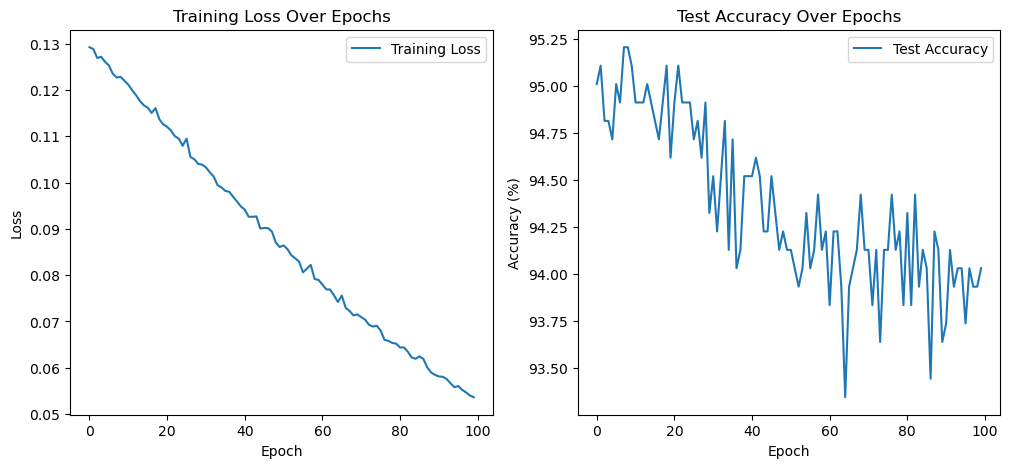

In [38]:
# Plot the loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.show()